In [1]:
import pandas as pd
import phantomdragon.functions as ph
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy import stats
import numpy as np

/data/shared/software/conda/christian_fellinger/envs/misc/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[5.89226213 5.53947304 6.6988349  5.57216876 7.12590825 9.30210903
 8.95701747 6.22692921 6.7621377  8.88541779 9.08897358 6.93079768
 8.4683228  8.27044201 7.22100067 7.87928049 7.87005397 5.9094417
 6.77528291 6.46884069 6.47929973 7.81884624 6.11704589 6.15084636
 4.81513959 7.2715701  6.10566695 6.8064975  7.05083085 6.82037451
 5.59369815 5.57348909 7.42794389 6.8314692  7.39063387 5.07341809
 6.33787412 5.18067895 8.18345095 6.5384238  6.43429542 8.17319034
 9.02519731 8.53870567 6.22136227 6.32757456 6.64217179 6.4388269
 6.85091368 5.7588345  7.42794557 7.84246259 6.06344547 5.64854354
 6.32989731 5.66513913 6.16133562 9.12579415 9.40195121 6.69898785
 7.22696089 6.37485197 6.43719442 6.94615226 9.35491259 5.85264378
 5.56756358 7.4978807  9.36512113 6.04991859 7.41140237 4.76420968
 5.25507274 6.59161111 5.28371457 5.76300905 6.41684104 5.90559034
 6.19443294 8.32700679 6.45250643 8.01849141 6.75349055 8.3234161
 6.22987799 7.61997289 5.69190495 7.51430989 6.66419822 8.0987450

,PDB code,Binding Affinity Score,Binding Affinity True,mae,mse,r2,sd,r
136,1a30,5.892262,3.32,1.968684,6.180069,-3.679567,1.149195,-0.009954
106,1bcu,5.539473,6.32,1.968684,6.180069,-3.679567,1.149195,-0.009954
240,1bzc,6.698835,6.10,1.968684,6.180069,-3.679567,1.149195,-0.009954
192,1c5z,5.572169,6.17,1.968684,6.180069,-3.679567,1.149195,-0.009954
165,1e66,7.125908,3.28,1.968684,6.180069,-3.679567,1.149195,-0.009954
...,...,...,...,...,...,...,...,...
264,5aba,5.975126,7.59,1.968684,6.180069,-3.679567,1.149195,-0.009954
242,5c28,5.455509,7.41,1.968684,6.180069,-3.679567,1.149195,-0.009954
125,5c2h,8.287138,4.76,1.968684,6.180069,-3.679567,1.149195,-0.009954
67,5dwr,8.125019,6.00,1.968684,6.180069,-3.679567,1.149195,-0.009954


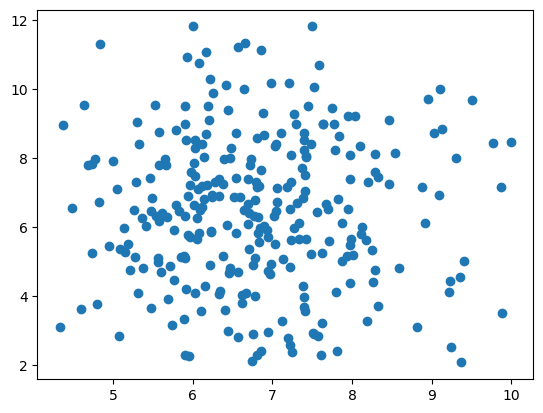

In [30]:
blub = ph.parameterCollector(add_information="GAP",modeltype="Lasso",scoretype="pKd pKi pIC50")
blub.set_datatype("ki")
a,b = blub.phantomscore(loadpath="../models/",features_test="GAP/data/core_set_grail_descr.csv")
# print(a,b)
data = {"PDB code":a,"Binding Affinity Score":b}
df = pd.DataFrame(data)
df = df.sort_values("PDB code")

hlp = pd.read_csv("../data/PDBbind_core_set_all.csv")
hlp = hlp[["pKd pKi pIC50","PDB code"]]
hlp = hlp.sort_values("PDB code")

df["Binding Affinity True"] = hlp["pKd pKi pIC50"]

x = np.array(df["Binding Affinity Score"])
y = np.array(df["Binding Affinity True"])
plt.scatter(x,y)
print(x,y)

mae = mean_absolute_error(x,y)
mse = mean_squared_error(x,y)
r2 = r2_score(x,y)
sd = np.std(x)
r = round(stats.pearsonr(x, y).statistic, 6)
df["mae"] = mae
df["mse"] = mse
df["r2"] = r2
df["sd"] = sd
df["r"] = r

print(list(hlp["PDB code"]) == list(df["PDB code"]))

df

In [29]:
blub = ph.parameterCollector(add_information="GAP",modeltype="Lasso",scoretype="pKd pKi pIC50")
# x_train,x_test,y_train,y_test = ph.prepare_data("pKd pKi pIC50","GAP/data/ref_set_grail_descr.csv","GAP/data/core_set_grail_descr.csv",f"../data/PDBbind_refined_set_ki.csv",f"../data/PDBbind_core_set_all.csv","GAP")
x_train,x_test,y_train,y_test = ph.prepare_data("pKd pKi pIC50","/data/shared/projects/pharmacophore_hot_spot_analysis/GAP/data/ref_set_x_descrs.csv","/data/shared/projects/pharmacophore_hot_spot_analysis/GAP/data/core_set_x_descrs.csv",f"../data/PDBbind_refined_set_ki.csv",f"../data/PDBbind_core_set_all.csv","GAP")
blub.set_trainingdata(x_train,y_train)
blub.set_testingdata(x_test,y_test)
blub.set_datatype("ki")
blub.train_and_save_model(savepath="../models/")
a = blub.phantomtest(loadpath="../models/",return_values=True)
print(a)

###############
    

# blub.plot_phantomtest("../plots/")
# modeltype,scoret,datatype,mae,mse,sd,pearsonr,confidence_interval,r_2,add_info = blub.get_stats()

# print(len(values),values)
# print(modeltype,scoret,datatype,mae,mse,sd,pearsonr,confidence_interval,r_2,add_info)

# plt.scatter(values,y)
# r = round(stats.pearsonr(values, y).statistic, 6)
# print(r)

/home/cfellinger/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9636454108581347, tolerance: 0.7906321464025358
  model = cd_fast.enet_coordinate_descent_gram(
/home/cfellinger/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.3354601774035473, tolerance: 0.7906321464025358
  model = cd_fast.enet_coordinate_descent_gram(
/home/cfellinger/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.9783988733429396, tolerance: 0.7906321464025358
  model = cd_fast.enet_coordinate_descent_gram(
/home/cfellinger/anaconda3/lib/python3.9/site-packag

[6.9634308  7.57802084 7.74657586 6.096129   5.79748519 7.04173967
 6.98509609 7.35558511 5.39226752 6.99832113 5.0448918  6.81138946
 7.18856605 9.04264085 5.66968639 7.47692868 8.03143721 7.09671813
 8.4061503  8.69879335 6.38218542 5.13467029 5.31654822 6.14612085
 8.8926266  7.71217935 8.11187258 5.67063163 6.41495519 7.93021261
 6.67205535 5.23482056 9.33317532 5.02030396 7.62326861 5.7207497
 5.60318064 6.40630097 7.03863129 7.68481442 7.16472495 5.73092125
 7.7496457  7.81340336 6.56859996 4.56834883 6.88604155 5.89450964
 5.78778309 5.73089634 5.82542637 4.97129278 5.04989491 5.05712167
 8.71267747 7.73093228 7.08975427 5.83605301 5.3345409  7.56018878
 6.5921715  5.45094164 5.76160941 5.21906847 7.33237394 4.7170655
 6.62156318 7.22571462 7.21893808 6.63628752 6.14651539 8.42501729
 6.38963769 7.78255728 4.61636276 7.19896686 6.18915363 9.61118058
 6.14439962 7.99060153 7.31597129 6.47619004 5.80759049 7.27258873
 6.79130612 4.56530843 5.13787645 4.33015552 6.41082014 5.812042

In [ ]:
v = []
s = []

for i in df["Binding Affinity Score"]:
    hlp = round(i,12)
    s.append(hlp)
for j in values:
    hlp = round(j,12)
    v.append(hlp)

h=0

for i in v:
    print(i in s)
    if i in s:
        h += 1

print(h)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


0       4k5p
1       1f74
2       5uc4
3       5zhl
4       5vi6
        ... 
5311    1t31
5312    1gfy
5313    3qps
5314    2b9a
5315    1ols
Name: PDB code, Length: 5316, dtype: object [5.08975891 4.62238416 6.5270663  ... 6.01293236 5.56127487 7.3457855 ]
[5.44260267 6.17410246 5.50467381 ... 6.62954222 6.99999221 7.30888927] [7.82 7.6  6.91 ... 5.82 8.66 5.05]
True


,PDB code,Binding Affinity Score,Binding Affinity True,mae,mse,r2,sd,r
4068,10gs,5.442603,7.82,2.236121e+14,1.154640e+32,-0.000433,1.074309e+16,-0.016721
1945,184l,6.174102,7.60,2.236121e+14,1.154640e+32,-0.000433,1.074309e+16,-0.016721
1864,185l,5.504674,6.91,2.236121e+14,1.154640e+32,-0.000433,1.074309e+16,-0.016721
993,186l,6.183032,2.80,2.236121e+14,1.154640e+32,-0.000433,1.074309e+16,-0.016721
5175,187l,5.627454,5.75,2.236121e+14,1.154640e+32,-0.000433,1.074309e+16,-0.016721
...,...,...,...,...,...,...,...,...
5259,7std,7.885407,6.72,2.236121e+14,1.154640e+32,-0.000433,1.074309e+16,-0.016721
843,7upj,7.271423,6.30,2.236121e+14,1.154640e+32,-0.000433,1.074309e+16,-0.016721
1693,8a3h,6.629542,5.82,2.236121e+14,1.154640e+32,-0.000433,1.074309e+16,-0.016721
361,8cpa,6.999992,8.66,2.236121e+14,1.154640e+32,-0.000433,1.074309e+16,-0.016721


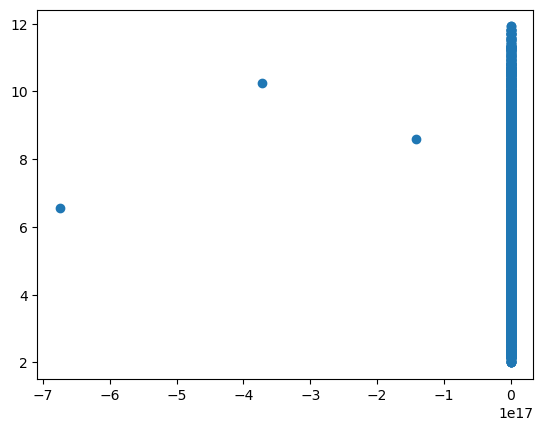

In [16]:
blub = ph.parameterCollector(add_information="GAP",modeltype="Lasso",scoretype="pKd pKi pIC50")
blub.set_datatype("ki")
a,b = blub.phantomscore(loadpath="../models/",features_test="GAP/data/ref_set_grail_descr.csv")
print(a,b)
data = {"PDB code":a,"Binding Affinity Score":b}
df = pd.DataFrame(data)
df = df.sort_values("PDB code")

hlp = pd.read_csv("../data/PDBbind_refined_set_all.csv")
hlp = hlp[["pKd pKi pIC50","PDB code"]]
hlp = hlp.sort_values("PDB code")

df["Binding Affinity True"] = hlp["pKd pKi pIC50"]

x = np.array(df["Binding Affinity Score"])
y = np.array(df["Binding Affinity True"])
plt.scatter(x,y)
print(x,y)

mae = mean_absolute_error(x,y)
mse = mean_squared_error(x,y)
r2 = r2_score(x,y)
sd = np.std(x)
r = round(stats.pearsonr(x, y).statistic, 6)
df["mae"] = mae
df["mse"] = mse
df["r2"] = r2
df["sd"] = sd
df["r"] = r

print(list(hlp["PDB code"]) == list(df["PDB code"]))

df

In [31]:
datatypes = ["ki"]
modeltypes = ["Lasso"]
scoretypes = ["pKd pKi pIC50"]

for k in datatypes:
    for modeltype in modeltypes:
        for score in scoretypes:

            blub = ph.parameterCollector(add_information="GAP",modeltype=modeltype,scoretype=score)
            blub.set_datatype(f"{k}")
            frame, affinity = blub.phantomscore("/data/shared/projects/master_linda/1njs/descr_1njs.csv","../models/","Frame")

data = {"Frame":frame,"Binding Affinity":affinity}
df = pd.DataFrame(data)
print(df)

     Frame  Binding Affinity
0        0       1176.475803
1        1       1627.991429
2        2       3532.467338
3        3       3617.329219
4        4       2761.598986
...    ...               ...
4995  4995          5.554829
4996  4996          5.623806
4997  4997          5.790142
4998  4998          3.848038
4999  4999       3014.671595

[5000 rows x 2 columns]


In [7]:
df1 = pd.read_csv("/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/PDBbind_2021/GRADE_1981_2000.csv")
df2 = pd.read_csv("/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/PDBbind_2021/GRADE_2001_2010.csv")
df3 = pd.read_csv("/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/PDBbind_2021/GRADE_2011_2020.csv")
df4 = pd.read_csv("/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/PDBbind_2021/GRADE_CASF2016.csv")
print(df1.shape,df2.shape,df3.shape,df4.shape)
df = pd.concat([df1,df2])
print(df.shape)
df.to_csv("/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/PDBbind_2021/GRADE_1981_2010.csv",index=False)

df1 = pd.read_csv("/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/PDBbind_2021/X-GRADE_1981_2000.csv")
df2 = pd.read_csv("/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/PDBbind_2021/X-GRADE_2001_2010.csv")
df3 = pd.read_csv("/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/PDBbind_2021/X-GRADE_2011_2020.csv")
df4 = pd.read_csv("/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/PDBbind_2021/X-GRADE_CASF2016.csv")
print(df1.shape,df2.shape,df3.shape,df4.shape)
df = pd.concat([df1,df2])
print(df.shape)
df.to_csv("/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/PDBbind_2021/X-GRADE_1981_2010.csv",index=False)

(1235, 36) (6231, 36) (15454, 36) (285, 36)
(7466, 36)


/tmp/ipykernel_3960074/314414560.py:11: DtypeWarning: Columns (32,96) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv("/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/PDBbind_2021/X-GRADE_2001_2010.csv")
/tmp/ipykernel_3960074/314414560.py:12: DtypeWarning: Columns (32,84,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv("/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/PDBbind_2021/X-GRADE_2011_2020.csv")


(1235, 178) (6231, 178) (15454, 178) (285, 178)
(7466, 178)
